In [4]:
using DataFrames, CSV, Plots, StatsPlots
df = CSV.read("risk_aversion_results.csv", DataFrame)

Row,δ,Ψ,objective,ζ_total,max_u,PV,Wind,Gas,Battery_P,Battery_E
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.0,0.5,6.30236e8,294.255,3959.94,7.03882e-5,154.607,44.7153,40.3586,175.821
2,1.0,0.2,6.30236e8,294.255,3959.94,7.03882e-5,154.607,44.7153,40.3586,175.821
3,1.0,0.1,6.30236e8,294.255,3959.94,7.03882e-5,154.607,44.7153,40.3586,175.821
4,0.8,0.5,5.04313e8,6.21047e5,5.51145e-5,0.000123331,154.607,44.7158,40.3588,175.821
5,0.8,0.2,5.04313e8,6.21047e5,2.14912e-5,0.000120313,154.607,44.7158,40.3588,175.821
6,0.8,0.1,5.04313e8,6.21047e5,1.17801e-5,0.000132256,154.607,44.7157,40.3589,175.821
7,0.5,0.5,3.15428e8,6.21047e5,2.73999e-5,0.0002638,154.607,44.7171,40.3591,175.821
8,0.5,0.2,3.15428e8,6.21047e5,8.89232e-6,0.000214632,154.607,44.7171,40.3592,175.822
9,0.5,0.1,3.15429e8,6.21048e5,1.92718e-6,9.33197e-5,154.607,44.7172,40.3588,175.821


1. Objective Value vs. δ (for each Ψ)

Why: Shows how the central planner sacrifices expected profit to gain robustness (CVaR) as δ ↓.

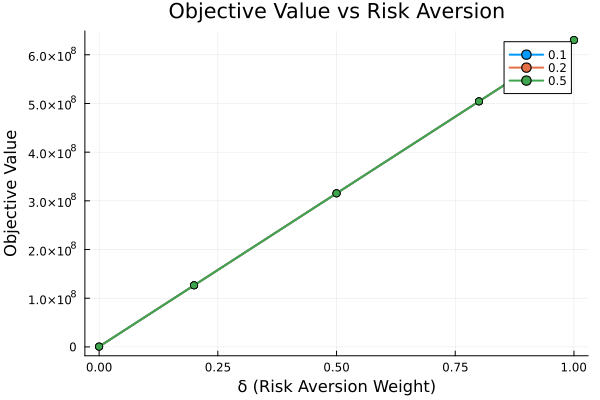

In [5]:
@df df plot(:δ, :objective,
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Objective Value",
    title = "Objective Value vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :circle
)

 2. ζ_total vs. δ (for each Ψ)
 
Why: Shows how the VaR (worst-case welfare) shifts under different δ — should become more conservative.

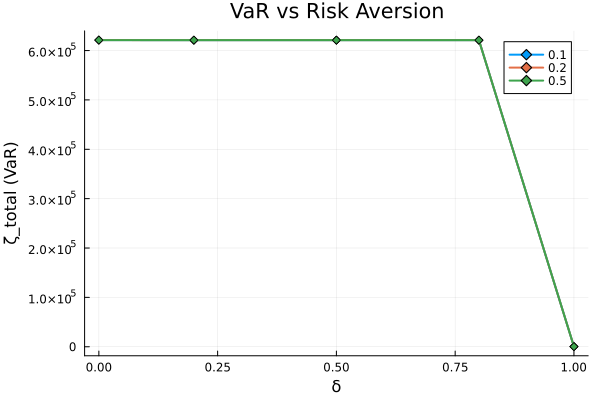

In [6]:
@df df plot(:δ, :ζ_total,
    group = :Ψ,
    xlabel = "δ",
    ylabel = "ζ_total (VaR)",
    title = "VaR vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :diamond
)


3. max_u (worst-case shortfall) vs. δ

Why: See if any scenario dips below ζ_total — this helps confirm if CVaR is active.

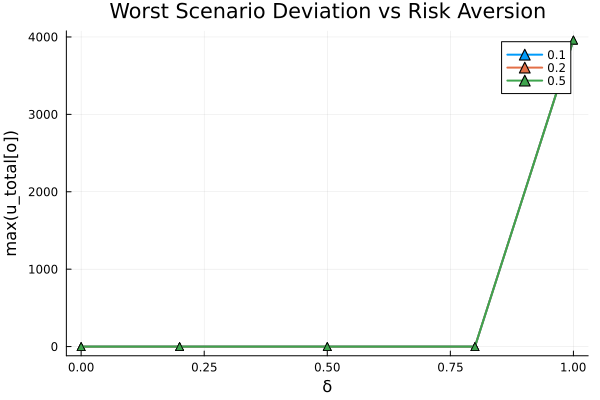

In [7]:
@df df plot(:δ, :max_u,
    group = :Ψ,
    xlabel = "δ",
    ylabel = "max(u_total[o])",
    title = "Worst Scenario Deviation vs Risk Aversion",
    legend = :topright,
    lw = 2,
    markershape = :utriangle
)


4. Investment by Technology vs. δ

Gas, Wind, PV, Storage — shows how the planner shifts the capacity mix to hedge risk.

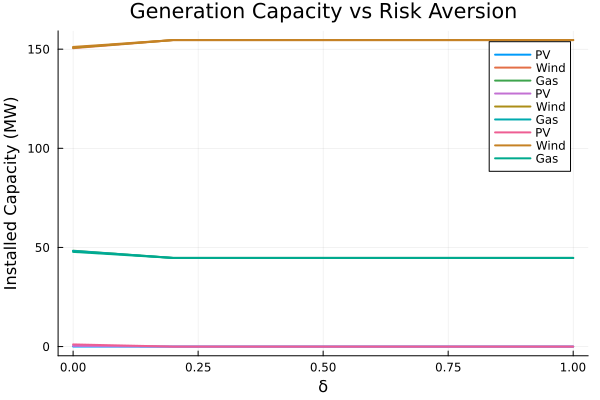

In [ ]:
@df df plot(:δ, [:PV :Wind :Gas],
    group = :Ψ,
    xlabel = "δ",
    ylabel = "Installed Capacity (MW)",
    title = "Generation Capacity vs Risk Aversion",
    label = ["PV" "Wind" "Gas"],
    legend = :topright,
    lw = 2
)


In [ ]:
@df df plot(:δ, [:Battery_P :Battery_E],
    group = :Ψ,
    xlabel = "δ",
    ylabel = "Battery Capacity",
    title = "Battery Investment vs Risk Aversion",
    label = ["Power (MW)" "Energy (MWh)"],
    lw = 2,
    legend = :topright
)

5. Total Firm Capacity vs δ (Grouped by Ψ)

This will show how the model adds Gas + Battery_Power as δ ↓ to hedge against uncertain renewables.

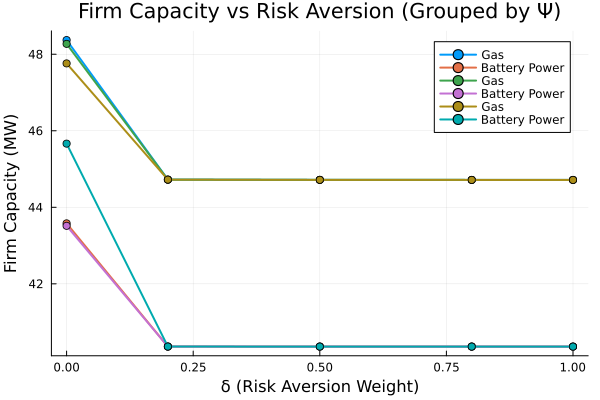

In [9]:
@df df plot(:δ,
    [:Gas :Battery_P],
    group = :Ψ,
    xlabel = "δ (Risk Aversion Weight)",
    ylabel = "Firm Capacity (MW)",
    title = "Firm Capacity vs Risk Aversion (Grouped by Ψ)",
    label = ["Gas" "Battery Power"],
    lw = 2,
    markershape = :circle,
    legend = :topright
)